# Packages

In [11]:
!pip install bitsandbytes
!pip install -U bitsandbytes
!pip install --upgrade transformers
!pip install pdf2image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.0/664.8 MB 16.3 MB/s eta 0:00:28
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.4 MB/s eta 0:00:00
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please u

In [12]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.7 [186 kB]
Fetched 186 kB in 0s (714 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.7_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.7) ...
Setting up poppler-utils (22.02.0-2ubuntu0.7) ...
Processing triggers for man-db (2.10.2-1) ...


#  PDF to Images

In [ ]:
from pdf2image import convert_from_path

# Chemin du fichier PDF
pdf_path = ""

# Convertir chaque page du PDF en image (format PIL.Image)
images = convert_from_path(pdf_path)

# Afficher combien d’images extraites
print(f"✅ {len(images)} pages extraites en tant qu'images.")

✅ 1 pages extraites en tant qu'images.


Page numero :  0


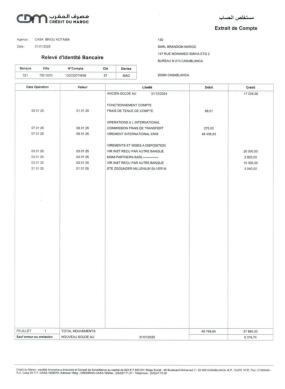

------------------------------------------



In [ ]:
import matplotlib.pyplot as plt

# Par exemple, pour enregistrer chaque page en JPEG :
for i, img in enumerate(images):
  print('Page numero : ',i)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

  print('------------------------------------------\n')

# meta-llama/Llama-4-Maverick-17B-128E-Instruct

## Client Huggin Face

In [ ]:
from huggingface_hub import InferenceClient

client = InferenceClient(
    provider="sambanova",
    api_key="",
)

In [ ]:
client

<InferenceClient(model='', timeout=None)>

## Prompt

In [ ]:
prompt = """
Tu vas lire un relevé bancaire présenté sous forme d'image.

Ta mission est d'extraire **exclusivement** les lignes de transaction figurant dans le tableau contenant les colonnes :
- 'Date Opération'
- 'Date Valeur'
- 'Libellé'
- 'Débit'
- 'Crédit'

Tu dois convertir chaque ligne en un objet JSON avec la structure suivante :
- "date_operation": string (format JJ/MM/AAAA)
- "date_valeur": string (format JJ/MM/AAAA)
- "libelle": string (texte affiché sur la même ligne)
- "debit": number (valeur numérique avec point comme séparateur, ou null)
- "credit": number (valeur numérique avec point comme séparateur, ou null)

### Règles strictes :
1. Ignore complètement les lignes sans 'Date Opération' (comme les lignes de solde, entête, totaux ou notes).
2. Ne prends **que** les lignes situées **à l’intérieur du tableau** des transactions.
3. Chaque ligne du tableau correspond à un objet JSON distinct. **Ne regroupe jamais plusieurs lignes.**
4. Ne complète jamais une ligne incomplète à partir d'une autre. Si une donnée est absente, mets-la à `null`.
5. Le `libelle` doit contenir **tout le texte affiché sur la ligne**, y compris s’il est long ou inclut des numéros de carte ou majuscules.
6. Le `debit` ou `credit` ne peut jamais être présent ensemble dans une même ligne : c’est **soit l’un soit l’autre**.
7. Tu dois retourner un **tableau JSON** contenant uniquement ces objets, sans explication, sans introduction, sans texte additionnel.

### Format de sortie attendu :
```json
[
  {
    "date_operation": "JJ/MM/AAAA",
    "date_valeur": "JJ/MM/AAAA",
    "libelle": "TEXTE",
    "debit": 123.45,
    "credit": null
  },
  ...
]
Attention : Ne prends aucune ligne contenant : "ANCIEN SOLDE", "NOUVEAU SOLDE", "TOTAL MOUVEMENTS", "FEUILLET", etc.

Tu dois être strictement aligné sur ce format et ces consignes.
"""

## Convert image to Base64

In [ ]:
import base64
import time
from PIL import Image
import io

# --- Encoder une image PIL en base64
def encode_image_to_base64(img):
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)
    buffered = io.BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [ ]:
# --- Image encodée depuis variable 'img'
image_base64 = encode_image_to_base64(img)

## Model interaction

In [ ]:
import time

# --- Lancement avec chrono
start_time = time.time()

completion = client.chat.completions.create(
    model="meta-llama/Llama-4-Maverick-17B-128E-Instruct",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": prompt
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{image_base64}"
                    }
                }
            ]
        }
    ],
    max_tokens=2048,
    temperature=0.1,
)

end_time = time.time()

In [ ]:
# --- Résultat
print(completion.choices[0].message.content)
print(f"\n🕒 Temps d'exécution : {end_time - start_time:.2f} secondes")

```json
[
  {
    "date_operation": "02/01/2025",
    "date_valeur": "01/01/2025",
    "libelle": "FONCTIONNEMENT COMPTE FRAIS DE TENUE DE COMPTE",
    "debit": 88.01,
    "credit": null
  },
  {
    "date_operation": "07/01/2025",
    "date_valeur": "09/01/2025",
    "libelle": "OPERATIONS A L INTERNATIONAL COMMISSION FRAIS DE TRANSFERT",
    "debit": 275.0,
    "credit": null
  },
  {
    "date_operation": "07/01/2025",
    "date_valeur": "09/01/2025",
    "libelle": "VIREMENT INTERNATIONAL EMIS",
    "debit": 48406.83,
    "credit": null
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libelle": "VIREMENTS ET MISES A DISPOSITION VIR INST RECU PAR AUTRE BANQUE",
    "debit": null,
    "credit": 20000.0
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libelle": "MGM-PARTNERS-SARL-----------",
    "debit": null,
    "credit": 2820.0
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libe

# String To Json

In [ ]:
json_response = completion.choices[0].message.content

print(json_response)

```json
[
  {
    "date_operation": "02/01/2025",
    "date_valeur": "01/01/2025",
    "libelle": "FONCTIONNEMENT COMPTE FRAIS DE TENUE DE COMPTE",
    "debit": 88.01,
    "credit": null
  },
  {
    "date_operation": "07/01/2025",
    "date_valeur": "09/01/2025",
    "libelle": "OPERATIONS A L INTERNATIONAL COMMISSION FRAIS DE TRANSFERT",
    "debit": 275.0,
    "credit": null
  },
  {
    "date_operation": "07/01/2025",
    "date_valeur": "09/01/2025",
    "libelle": "VIREMENT INTERNATIONAL EMIS",
    "debit": 48406.83,
    "credit": null
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libelle": "VIREMENTS ET MISES A DISPOSITION VIR INST RECU PAR AUTRE BANQUE",
    "debit": null,
    "credit": 20000.0
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libelle": "MGM-PARTNERS-SARL-----------",
    "debit": null,
    "credit": 2820.0
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libe

In [ ]:
import json

# Nettoyer le contenu renvoyé
def clean_json_response(raw_text):
    # Supprime les balises de code Markdown comme ```json ou ```
    return raw_text.strip().removeprefix("```json").removeprefix("```").removesuffix("```").strip()

# Appliquer le nettoyage
cleaned_json = clean_json_response(json_response)
print(cleaned_json)

[
  {
    "date_operation": "02/01/2025",
    "date_valeur": "01/01/2025",
    "libelle": "FONCTIONNEMENT COMPTE FRAIS DE TENUE DE COMPTE",
    "debit": 88.01,
    "credit": null
  },
  {
    "date_operation": "07/01/2025",
    "date_valeur": "09/01/2025",
    "libelle": "OPERATIONS A L INTERNATIONAL COMMISSION FRAIS DE TRANSFERT",
    "debit": 275.0,
    "credit": null
  },
  {
    "date_operation": "07/01/2025",
    "date_valeur": "09/01/2025",
    "libelle": "VIREMENT INTERNATIONAL EMIS",
    "debit": 48406.83,
    "credit": null
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libelle": "VIREMENTS ET MISES A DISPOSITION VIR INST RECU PAR AUTRE BANQUE",
    "debit": null,
    "credit": 20000.0
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libelle": "MGM-PARTNERS-SARL-----------",
    "debit": null,
    "credit": 2820.0
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libelle": "V

In [ ]:
# Charger le JSON
try:
    transactions = json.loads(cleaned_json)
    for t in transactions:
        print(f"📅 {t['date_operation']} | 💸 Débit: {t['debit']} | 💰 Crédit: {t['credit']}")
except json.JSONDecodeError as e:
    print("❌ Erreur de parsing JSON :", e)
    print("🔎 Contenu brut :", repr(cleaned_json))

📅 02/01/2025 | 💸 Débit: 88.01 | 💰 Crédit: None
📅 07/01/2025 | 💸 Débit: 275.0 | 💰 Crédit: None
📅 07/01/2025 | 💸 Débit: 48406.83 | 💰 Crédit: None
📅 03/01/2025 | 💸 Débit: None | 💰 Crédit: 20000.0
📅 03/01/2025 | 💸 Débit: None | 💰 Crédit: 2820.0
📅 03/01/2025 | 💸 Débit: None | 💰 Crédit: 10000.0
📅 21/01/2025 | 💸 Débit: None | 💰 Crédit: 5040.0


In [ ]:
transactions

[{'date_operation': '02/01/2025',
  'date_valeur': '01/01/2025',
  'libelle': 'FONCTIONNEMENT COMPTE FRAIS DE TENUE DE COMPTE',
  'debit': 88.01,
  'credit': None},
 {'date_operation': '07/01/2025',
  'date_valeur': '09/01/2025',
  'libelle': 'OPERATIONS A L INTERNATIONAL COMMISSION FRAIS DE TRANSFERT',
  'debit': 275.0,
  'credit': None},
 {'date_operation': '07/01/2025',
  'date_valeur': '09/01/2025',
  'libelle': 'VIREMENT INTERNATIONAL EMIS',
  'debit': 48406.83,
  'credit': None},
 {'date_operation': '03/01/2025',
  'date_valeur': '03/01/2025',
  'libelle': 'VIREMENTS ET MISES A DISPOSITION VIR INST RECU PAR AUTRE BANQUE',
  'debit': None,
  'credit': 20000.0},
 {'date_operation': '03/01/2025',
  'date_valeur': '03/01/2025',
  'libelle': 'MGM-PARTNERS-SARL-----------',
  'debit': None,
  'credit': 2820.0},
 {'date_operation': '03/01/2025',
  'date_valeur': '03/01/2025',
  'libelle': 'VIR INST RECU PAR AUTRE BANQUE',
  'debit': None,
  'credit': 10000.0},
 {'date_operation': '21/01

# Json To Excel

In [ ]:
import pandas as pd

# Convertir le JSON (list of dict) en DataFrame
df = pd.DataFrame(transactions)

df

,date_operation,date_valeur,libelle,debit,credit
0,02/01/2025,01/01/2025,FONCTIONNEMENT COMPTE FRAIS DE TENUE DE COMPTE,88.01,NaN
1,07/01/2025,09/01/2025,OPERATIONS A L INTERNATIONAL COMMISSION FRAIS ...,275.00,NaN
2,07/01/2025,09/01/2025,VIREMENT INTERNATIONAL EMIS,48406.83,NaN
3,03/01/2025,03/01/2025,VIREMENTS ET MISES A DISPOSITION VIR INST RECU...,NaN,20000.0
4,03/01/2025,03/01/2025,MGM-PARTNERS-SARL-----------,NaN,2820.0
5,03/01/2025,03/01/2025,VIR INST RECU PAR AUTRE BANQUE,NaN,10000.0
6,21/01/2025,21/01/2025,STE ZGOUNDER MILLENIUM SILVER M,NaN,5040.0


In [ ]:
# Enregistrer en fichier Excel
df.to_excel("releve_bancaire.xlsx", index=False)

print("✅ Fichier Excel 'releve_bancaire.xlsx' créé avec succès !")

✅ Fichier Excel 'releve_bancaire.xlsx' créé avec succès !


# .

# ..

# ...

# Functions

## PDF_TO_Images

In [ ]:
from pdf2image import convert_from_path
import os

def PDF_TO_Images(pdf_path):
    try:
        # Vérifie que le fichier existe
        if not os.path.exists(pdf_path):
            raise FileNotFoundError(f"❌ Fichier non trouvé : {pdf_path}")

        # Convertit chaque page du PDF en image (format PIL.Image)
        images = convert_from_path(pdf_path)

        if not images:
            raise ValueError("❌ Aucune page n'a été convertie en image.")

        print(f"✅ {len(images)} pages extraites en tant qu'images.")
        return images

    except FileNotFoundError as fnf_error:
        print(fnf_error)
    except Exception as e:
        print(f"❌ Erreur pendant la conversion du PDF : {e}")

    # Retourne une liste vide en cas d’erreur
    return []


In [ ]:
# Chemin du fichier PDF
pdf_path = ""

images = PDF_TO_Images(pdf_path)
print(images)

✅ 1 pages extraites en tant qu'images.
[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=3442x4873 at 0x7EB084EA2090>]


## Creat_Client

In [ ]:
from huggingface_hub import InferenceClient

def Creat_Client(api_key):
  client = InferenceClient(
      provider="sambanova",
      api_key=api_key,
  )

  if client:
    print("Client prêt à être utilisé.")
    return client
  else:
    print("Client prêt à être utilisé.")
    return None

In [ ]:
api_key = ""

client = Creat_Client(api_key)
print(client)

Client prêt à être utilisé.
<InferenceClient(model='', timeout=None)>


In [ ]:
prompt = """
Tu vas lire un relevé bancaire présenté sous forme d'image.

Ta mission est d'extraire **exclusivement** les lignes de transaction figurant dans le tableau contenant les colonnes :
- 'Date Opération'
- 'Date Valeur'
- 'Libellé'
- 'Débit'
- 'Crédit'

Tu dois convertir chaque ligne en un objet JSON avec la structure suivante :
- "date_operation": string (format JJ/MM/AAAA)
- "date_valeur": string (format JJ/MM/AAAA)
- "libelle": string (texte affiché sur la même ligne)
- "debit": number (valeur numérique avec point comme séparateur, ou null)
- "credit": number (valeur numérique avec point comme séparateur, ou null)

### Règles strictes :
1. Ignore complètement les lignes sans 'Date Opération' (comme les lignes de solde, entête, totaux ou notes).
2. Ne prends **que** les lignes situées **à l’intérieur du tableau** des transactions.
3. Chaque ligne du tableau correspond à un objet JSON distinct. **Ne regroupe jamais plusieurs lignes.**
4. Ne complète jamais une ligne incomplète à partir d'une autre. Si une donnée est absente, mets-la à `null`.
5. Le `libelle` doit contenir **tout le texte affiché sur la ligne**, y compris s’il est long ou inclut des numéros de carte ou majuscules.
6. Le `debit` ou `credit` ne peut jamais être présent ensemble dans une même ligne : c’est **soit l’un soit l’autre**.
7. Tu dois retourner un **tableau JSON** contenant uniquement ces objets, sans explication, sans introduction, sans texte additionnel.

### Format de sortie attendu :
```json
[
  {
    "date_operation": "JJ/MM/AAAA",
    "date_valeur": "JJ/MM/AAAA",
    "libelle": "TEXTE",
    "debit": 123.45,
    "credit": null
  },
  ...
]
Attention : Ne prends aucune ligne contenant : "ANCIEN SOLDE", "NOUVEAU SOLDE", "TOTAL MOUVEMENTS", "FEUILLET", etc.

Tu dois être strictement aligné sur ce format et ces consignes.
"""

## Encode image to base64

In [ ]:
import base64
import time
from PIL import Image
import io

# --- Encoder une image PIL en base64
def encode_image_to_base64(img):
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)
    buffered = io.BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [ ]:
# --- Image encodée depuis variable 'img'
for img in images:
  image_base64 = encode_image_to_base64(img)

  print(image_base64)

iVBORw0KGgoAAAANSUhEUgAADXIAABMJCAIAAAD8+CR8AAEAAElEQVR4nOy96XbcuLKtGwGwyUaS7VprnD3O+z/aPWOvVe6k7NgCiPsjACSzVUruZNf8SiWnmGxAEARAYHIGPz09MbMxxhjDzMxMRCKSfyv5q8zRtwQAAAAAAAAAAAAAAAAAAAAAAACA1zKdhX/pmnmJCgC+5RBH6+Q/RSRrCUQkhJA/TL8lImNMURTWWk5M93C0/0sJPtoWAJC5dJM+u+azy/Mdd3rr6RLckgD8LtxYM/CEtm0fHx+/fv3qvSeifUN+Kis8ArJCAAAAAAAAAAAAAAAAAAAAAAAA4AfxrNDniprwO8oKr2wyPVxWE57KCo+8jXJ6psLE6dldkhUS1AgAnOOlYsHTFSArBOCP5/YWf6os1OZbt4WsEAAAAAAAAAAAAAAAAAAAAAAAAPj1vE1Z4aX9ZIHgqayQTjQKuuRFssL87XdJMAB/EpAVAgCe5aWyQiJSTaG1VpcfyArp6v1/paeCWgMAAAAAAAAAAAAAAAAAAAAAAAD4Fr6XrPBK7OBXBEG+sitFbY1OJYNT36P851lZ4S1CBQBA5ifICk+XHH2FexOAN86LZIX64VhW+EPSBQAAAAAAAAAAAAAAAAAAAAAAAIDflrNyhKkoMISgVoWZLC5kZmuttVajJuqS6X4gSAIAAADeOFFWeF3+DwAAAAAAAAAAAAAAAAAAAAAAAIC3xg+a6D+KaJwX6ocsIvTe62fn3FRcaK0ty1KTF0KYChKgTADgx/GsTel0hSPT0Bt3BQD45/B93Apvd00EAAAAAAAAAAAAAAAAAAAAAAAAwO28dEb+x83gZ59CxSecc/pBlxdFQUmWVBSFflDnwtcdEQDw1sC9CcAfT5E9ivXD7cJkAAAAAAAAAAAAAAAAAAAAAAAAAPx8rlgJXlrh0qT/JZeys+vn3U7DH09lhYqITEWE6l94PRk3phYAcIVnpX7TW/h76QJx

## Query_Model

In [ ]:
import time
from huggingface_hub.utils import HfHubHTTPError

def Query_Model(prompt, image_base64, client):
    try:
        start_time = time.time()

        completion = client.chat.completions.create(
            model="meta-llama/Llama-4-Maverick-17B-128E-Instruct",
            messages=[
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "text",
                            "text": prompt
                        },
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/png;base64,{image_base64}"
                            }
                        }
                    ]
                }
            ],
            max_tokens=2048,
            temperature=0.1,
        )

        elapsed_time = time.time() - start_time
        return {'completion': completion, 'elapsed_time': elapsed_time}

    except HfHubHTTPError as e:
        print("❌ Erreur HuggingFace API:", e)
        if "401" in str(e):
            print("🔑 Vérifie ta clé API : elle semble invalide ou expirée.")
    except Exception as e:
        print("❌ Erreur inattendue:", e)

    return None

In [ ]:
response = Query_Model(prompt, image_base64, client)

In [ ]:
response

{'completion': ChatCompletionOutput(choices=[ChatCompletionOutputComplete(finish_reason='stop', index=0, message=ChatCompletionOutputMessage(role='assistant', content='```json\n[\n  {\n    "date_operation": "22/01/2025",\n    "date_valeur": "22/01/2025",\n    "libelle": "ASSISTANCE ET ASSURANCE LIBERIS CARTE 130007181125022",\n    "debit": 151.32,\n    "credit": null\n  },\n  {\n    "date_operation": "03/01/2025",\n    "date_valeur": "03/01/2025",\n    "libelle": "PACKAGES FRAIS PACK CONFIANCE PRO",\n    "debit": 125.50,\n    "credit": null\n  },\n  {\n    "date_operation": "15/01/2025",\n    "date_valeur": "13/01/2025",\n    "libelle": "PRELEVEMENTS FRAIS PRELEVEMENT",\n    "debit": 11.00,\n    "credit": null\n  },\n  {\n    "date_operation": "15/01/2025",\n    "date_valeur": "15/01/2025",\n    "libelle": "PRELEVEMENT INWI",\n    "debit": 58.80,\n    "credit": null\n  },\n  {\n    "date_operation": "15/01/2025",\n    "date_valeur": "13/01/2025",\n    "libelle": "PRELEVEMENT CNSS",\n  

In [ ]:
print(response['completion'].choices[0].message.content)
print(response['elapsed_time'])

```json
[
  {
    "date_operation": "22/01/2025",
    "date_valeur": "22/01/2025",
    "libelle": "ASSISTANCE ET ASSURANCE LIBERIS CARTE 130007181125022",
    "debit": 151.32,
    "credit": null
  },
  {
    "date_operation": "03/01/2025",
    "date_valeur": "03/01/2025",
    "libelle": "PACKAGES FRAIS PACK CONFIANCE PRO",
    "debit": 125.50,
    "credit": null
  },
  {
    "date_operation": "15/01/2025",
    "date_valeur": "13/01/2025",
    "libelle": "PRELEVEMENTS FRAIS PRELEVEMENT",
    "debit": 11.00,
    "credit": null
  },
  {
    "date_operation": "15/01/2025",
    "date_valeur": "15/01/2025",
    "libelle": "PRELEVEMENT INWI",
    "debit": 58.80,
    "credit": null
  },
  {
    "date_operation": "15/01/2025",
    "date_valeur": "13/01/2025",
    "libelle": "PRELEVEMENT CNSS",
    "debit": 955.13,
    "credit": null
  },
  {
    "date_operation": "06/01/2025",
    "date_valeur": "06/01/2025",
    "libelle": "VIREMENTS ET MISES A DISPOSITION FRAIS VIREMENT",
    "debit": 22.00,


## String To Json

In [ ]:
import json

# Nettoyer le contenu renvoyé
def clean_json_response(raw_text):
    # Supprime les balises de code Markdown comme ```json ou ```
    return raw_text.strip().removeprefix("```json").removeprefix("```").removesuffix("```").strip()

In [ ]:
json_response = response['completion'].choices[0].message.content

# Appliquer le nettoyage
cleaned_json = clean_json_response(json_response)

In [ ]:
# Charger le JSON
try:
    transactions = json.loads(cleaned_json)
    for t in transactions:
        print(f"📅 {t['date_operation']} | 💸 Débit: {t['debit']} | 💰 Crédit: {t['credit']}")
except json.JSONDecodeError as e:
    print("❌ Erreur de parsing JSON :", e)
    print("🔎 Contenu brut :", repr(cleaned_json))

📅 22/01/2025 | 💸 Débit: 151.32 | 💰 Crédit: None
📅 03/01/2025 | 💸 Débit: 125.5 | 💰 Crédit: None
📅 15/01/2025 | 💸 Débit: 11.0 | 💰 Crédit: None
📅 15/01/2025 | 💸 Débit: 58.8 | 💰 Crédit: None
📅 15/01/2025 | 💸 Débit: 955.13 | 💰 Crédit: None
📅 06/01/2025 | 💸 Débit: 22.0 | 💰 Crédit: None
📅 06/01/2025 | 💸 Débit: 1200.0 | 💰 Crédit: None


## Json To Excel

In [ ]:
import pandas as pd

def Json_To_Excel(transactions):
  # Convertir le JSON (list of dict) en DataFrame
  df = pd.DataFrame(transactions)

  # Enregistrer en fichier Excel
  df.to_excel("releve_bancaire.xlsx", index=False)

  print("✅ Fichier Excel 'releve_bancaire.xlsx' créé avec succès !")
  return df

In [ ]:
Json_To_Excel(transactions)

✅ Fichier Excel 'releve_bancaire.xlsx' créé avec succès !


,date_operation,date_valeur,libelle,debit,credit
0,22/01/2025,22/01/2025,ASSISTANCE ET ASSURANCE LIBERIS CARTE 13000718...,151.32,None
1,03/01/2025,03/01/2025,PACKAGES FRAIS PACK CONFIANCE PRO,125.50,None
2,15/01/2025,13/01/2025,PRELEVEMENTS FRAIS PRELEVEMENT,11.00,None
3,15/01/2025,15/01/2025,PRELEVEMENT INWI,58.80,None
4,15/01/2025,13/01/2025,PRELEVEMENT CNSS,955.13,None
5,06/01/2025,06/01/2025,VIREMENTS ET MISES A DISPOSITION FRAIS VIREMENT,22.00,None
6,06/01/2025,06/01/2025,VIREMENT PERMANENT EMIS,1200.00,None


## PDF To Excel

In [ ]:
from pdf2image import convert_from_path
import os
from huggingface_hub import InferenceClient

In [ ]:
def PDF_TO_Images(pdf_path):
    try:
        # Vérifie que le fichier existe
        if not os.path.exists(pdf_path):
            raise FileNotFoundError(f"❌ Fichier non trouvé : {pdf_path}")

        # Convertit chaque page du PDF en image (format PIL.Image)
        images = convert_from_path(pdf_path)

        if not images:
            raise ValueError("❌ Aucune page n'a été convertie en image.")

        print(f"✅ {len(images)} pages extraites en tant qu'images.")
        return images

    except FileNotFoundError as fnf_error:
        print(fnf_error)
    except Exception as e:
        print(f"❌ Erreur pendant la conversion du PDF : {e}")

    # Retourne une liste vide en cas d’erreur
    return []

In [ ]:
def Creat_Client(api_key):
  client = InferenceClient(
      provider="sambanova",
      api_key=api_key,
  )

  if client:
    print("Client prêt à être utilisé.")
    return client
  else:
    print("Client prêt à être utilisé.")
    return None

In [ ]:
import base64
import time
from PIL import Image
import io

# --- Encoder une image PIL en base64
def encode_image_to_base64(img):
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)
    buffered = io.BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [ ]:
import time
from huggingface_hub.utils import HfHubHTTPError

def Query_Model(prompt, image_base64, client):
    try:
        start_time = time.time()

        completion = client.chat.completions.create(
            model="meta-llama/Llama-4-Maverick-17B-128E-Instruct",
            messages=[
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "text",
                            "text": prompt
                        },
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/png;base64,{image_base64}"
                            }
                        }
                    ]
                }
            ],
            max_tokens=2048,
            temperature=0.1,
        )

        elapsed_time = time.time() - start_time
        return {'completion': completion, 'elapsed_time': elapsed_time}

    except HfHubHTTPError as e:
        print("❌ Erreur HuggingFace API:", e)
        if "401" in str(e):
            print("🔑 Vérifie ta clé API : elle semble invalide ou expirée.")
    except Exception as e:
        print("❌ Erreur inattendue:", e)

    return None

In [ ]:
import json

# Nettoyer le contenu renvoyé
def clean_json_response(raw_text):
    # Supprime les balises de code Markdown comme ```json ou ```
    return raw_text.strip().removeprefix("```json").removeprefix("```").removesuffix("```").strip()

In [ ]:
import pandas as pd

def Json_To_Excel(transactions):
  # Convertir le JSON (list of dict) en DataFrame
  df = pd.DataFrame(transactions)

  # Enregistrer en fichier Excel
  df.to_excel("releve_bancaire.xlsx", index=False)

  print("✅ Fichier Excel 'releve_bancaire.xlsx' créé avec succès !")
  return df

In [ ]:
import matplotlib.pyplot as plt

def PDF_To_Excel(pdf_path, api_key):
  ### PDF TO_ Images
  images = PDF_TO_Images(pdf_path)

  # Plot the images
  print('==> Plot the images : \n')
  for img in images:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

  ### Creat Client
  client = Creat_Client(api_key)

  ### Encode image to base64
  images_base64 = []
  for img in images:
    images_base64.append(encode_image_to_base64(img))

  ### Query Model
  print('==> Query Model : \n')
  responses = []
  for image_base64 in images_base64:
    responses.append(Query_Model(prompt, image_base64, client))
    print(responses[-1])
    print('\n')
    print('--'*50+'\n')

  ### String To Json
  print('==> String To Json : \n')
  transactions = []
  for response in responses:
    json_response = response['completion'].choices[0].message.content
    print('! json_response : \n')
    print(json_response)
    print('!'*50)

    # Appliquer le nettoyage
    cleaned_json = clean_json_response(json_response)
    print('!! cleaned_json : \n')
    print(json_response)
    print('-!-!-'*50)

    # Charger le JSON
    try:
        transactions.append(json.loads(cleaned_json))
        print('!!! transactions[-1] : ')
        print(transactions[-1])
        print('-!!!-'*50+'\n')
        print('\n')
    except json.JSONDecodeError as e:
        print("❌ Erreur de parsing JSON :", e)
        print("🔎 Contenu brut :", repr(cleaned_json))

  ### Fusionner tous les resultats
  print('==> Fusionner tous les resultats : \n')
  merged_transaction = []
  for tran in transactions:
    merged_transaction.extend(tran)
  print(merged_transaction)
  print('--'*50+'\n')

  ### Json To Excel
  print('==> Json To Excel : \n')
  df = Json_To_Excel(merged_transaction)
  print(df)
  print('--'*50+'\n')

  return df

## PDF_To_Excel Version 2

In [ ]:
import matplotlib.pyplot as plt

def PDF_To_Excel(pdf_path, api_key):
  ### PDF TO_ Images
  images = PDF_TO_Images(pdf_path)

  # Plot the images
  print('==> Plot the images : \n')
  for img in images:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

  ### Creat Client
  client = Creat_Client(api_key)

  ### Encode image to base64
  images_base64 = []
  for img in images:
    images_base64.append(encode_image_to_base64(img))

  ### Query Model
  print('==> Query Model : \n')
  responses = []
  for image_base64 in images_base64:
    responses.append(Query_Model(prompt, image_base64, client))
    print(responses[-1])
    print('\n')
    print('--'*50+'\n')

  ### String To Json
  print('==> String To Json : \n')
  transactions = []
  for response in responses:
    json_response = response['completion'].choices[0].message.content
    print('! json_response : \n')
    print(json_response)
    print('!'*50)

    # Appliquer le nettoyage
    cleaned_json = clean_json_response(json_response)
    print('!! cleaned_json : \n')
    print(json_response)
    print('-!-!-'*50)

    # Charger le JSON
    try:
        transactions.append(json.loads(cleaned_json))
        print('!!! transactions[-1] : ')
        print(transactions[-1])
        print('-!!!-'*50+'\n')
        print('\n')
    except json.JSONDecodeError as e:
        print("❌ Erreur de parsing JSON :", e)
        print("🔎 Contenu brut :", repr(cleaned_json))

  ### Fusionner tous les resultats
  print('==> Fusionner tous les resultats : \n')
  merged_transaction = []
  for tran in transactions:
    merged_transaction.extend(tran)
  print(merged_transaction)
  print('--'*50+'\n')

  ### Json To Excel
  print('==> Json To Excel : \n')
  df = Json_To_Excel(merged_transaction)
  print(df)
  print('--'*50+'\n')

  ### Return Pandas && Excel
  excel_path = pdf_path.replace(".pdf", ".xlsx")
  df.to_excel(excel_path, index=False)
  return df, excel_path

## Application with one image

✅ 1 pages extraites en tant qu'images.
Plot the images : 



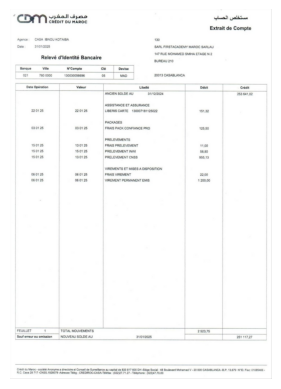

Client prêt à être utilisé.
Query Model : 

{'completion': ChatCompletionOutput(choices=[ChatCompletionOutputComplete(finish_reason='stop', index=0, message=ChatCompletionOutputMessage(role='assistant', content='```json\n[\n  {\n    "date_operation": "22/01/2025",\n    "date_valeur": "22/01/2025",\n    "libelle": "ASSISTANCE ET ASSURANCE LIBERIS CARTE 130007181125022",\n    "debit": 151.32,\n    "credit": null\n  },\n  {\n    "date_operation": "03/01/2025",\n    "date_valeur": "03/01/2025",\n    "libelle": "PACKAGES FRAIS PACK CONFIANCE PRO",\n    "debit": 125.50,\n    "credit": null\n  },\n  {\n    "date_operation": "15/01/2025",\n    "date_valeur": "13/01/2025",\n    "libelle": "PRELEVEMENTS FRAIS PRELEVEMENT",\n    "debit": 11.00,\n    "credit": null\n  },\n  {\n    "date_operation": "15/01/2025",\n    "date_valeur": "15/01/2025",\n    "libelle": "PRELEVEMENT INWI",\n    "debit": 58.80,\n    "credit": null\n  },\n  {\n    "date_operation": "15/01/2025",\n    "date_valeur": "13/01/20

In [ ]:
pdf_path = ""
api_key = ""

df = PDF_To_Excel(pdf_path, api_key)

In [ ]:
df

,date_operation,date_valeur,libelle,debit,credit
0,22/01/2025,22/01/2025,ASSISTANCE ET ASSURANCE LIBERIS CARTE 13000718...,151.32,None
1,03/01/2025,03/01/2025,PACKAGES FRAIS PACK CONFIANCE PRO,125.50,None
2,15/01/2025,13/01/2025,PRELEVEMENTS FRAIS PRELEVEMENT,11.00,None
3,15/01/2025,15/01/2025,PRELEVEMENT INWI,58.80,None
4,15/01/2025,13/01/2025,PRELEVEMENT CNSS,955.13,None
5,06/01/2025,06/01/2025,VIREMENTS ET MISES A DISPOSITION FRAIS VIREMENT,22.00,None
6,06/01/2025,06/01/2025,VIREMENT PERMANENT EMIS,1200.00,None


## Application with two images

✅ 2 pages extraites en tant qu'images.
==> Plot the images : 



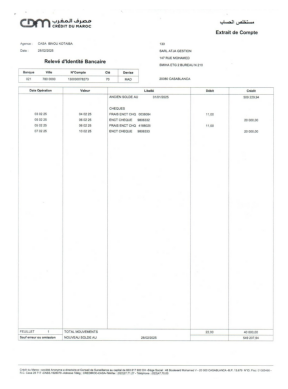

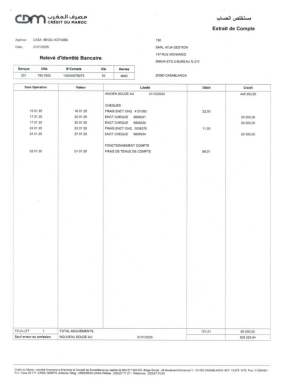

Client prêt à être utilisé.
==> Query Model : 

{'completion': ChatCompletionOutput(choices=[ChatCompletionOutputComplete(finish_reason='stop', index=0, message=ChatCompletionOutputMessage(role='assistant', content='```json\n[\n  {\n    "date_operation": "03/02/2025",\n    "date_valeur": "04/02/2025",\n    "libelle": "FRAIS ENCT CHQ 0038084",\n    "debit": 11.00,\n    "credit": null\n  },\n  {\n    "date_operation": "05/02/2025",\n    "date_valeur": "06/02/2025",\n    "libelle": "ENCT CHEQUE 9806332",\n    "debit": null,\n    "credit": 20000.00\n  },\n  {\n    "date_operation": "05/02/2025",\n    "date_valeur": "06/02/2025",\n    "libelle": "FRAIS ENCT CHQ 4188025",\n    "debit": 11.00,\n    "credit": null\n  },\n  {\n    "date_operation": "07/02/2025",\n    "date_valeur": "10/02/2025",\n    "libelle": "ENCT CHEQUE 9806333",\n    "debit": null,\n    "credit": 20000.00\n  }\n]\n```', tool_call_id=None, tool_calls=None), logprobs=None)], created=1745311931.8491497, id='6f49da88-5ddb-4fb2

In [ ]:
pdf_path = ""
api_key = ""

df = PDF_To_Excel(pdf_path, api_key)

In [ ]:
df

,date_operation,date_valeur,libelle,debit,credit
0,03/02/2025,04/02/2025,FRAIS ENCT CHQ 0038084,11.00,NaN
1,05/02/2025,06/02/2025,ENCT CHEQUE 9806332,NaN,20000.0
2,05/02/2025,06/02/2025,FRAIS ENCT CHQ 4188025,11.00,NaN
3,07/02/2025,10/02/2025,ENCT CHEQUE 9806333,NaN,20000.0
4,15/01/2025,16/01/2025,FRAIS ENCT CHQ 4131083,22.00,NaN
5,17/01/2025,20/01/2025,ENCT CHEQUE 9806331,NaN,20000.0
6,17/01/2025,20/01/2025,ENCT CHEQUE 9806330,NaN,20000.0
7,22/01/2025,23/01/2025,FRAIS ENCT CHQ 0038376,11.00,NaN
8,24/01/2025,27/01/2025,ENCT CHEQUE 9806334,NaN,20000.0
9,02/01/2025,01/01/2025,FRAIS DE TENUE DE COMPTE,88.01,NaN


# Application with Streamlit Interface

In [ ]:
#!pip install streamlit pandas

In [5]:
!pip install streamlit localtunnel

ERROR: Ignored the following versions that require a different python version: 0.55.2 Requires-Python <3.5
ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel


In [6]:
!pip install streamlit -q
!npm install -g localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [13]:
%%writefile app.py
import streamlit as st
import pandas as pd
import tempfile
import os
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from huggingface_hub import InferenceClient
import base64
import time
from PIL import Image
import io
import time
from huggingface_hub.utils import HfHubHTTPError
import json


# 👉 Mon Prompt
prompt = """
Tu vas lire un relevé bancaire présenté sous forme d'image.

Ta mission est d'extraire **exclusivement** les lignes de transaction figurant dans le tableau contenant les colonnes :
- 'Date Opération'
- 'Date Valeur'
- 'Libellé'
- 'Débit'
- 'Crédit'

Tu dois convertir chaque ligne en un objet JSON avec la structure suivante :
- "date_operation": string (format JJ/MM/AAAA)
- "date_valeur": string (format JJ/MM/AAAA)
- "libelle": string (texte affiché sur la même ligne)
- "debit": number (valeur numérique avec point comme séparateur, ou null)
- "credit": number (valeur numérique avec point comme séparateur, ou null)

### Règles strictes :
1. Ignore complètement les lignes sans 'Date Opération' (comme les lignes de solde, entête, totaux ou notes).
2. Ne prends **que** les lignes situées **à l’intérieur du tableau** des transactions.
3. Chaque ligne du tableau correspond à un objet JSON distinct. **Ne regroupe jamais plusieurs lignes.**
4. Ne complète jamais une ligne incomplète à partir d'une autre. Si une donnée est absente, mets-la à `null`.
5. Le `libelle` doit contenir **tout le texte affiché sur la ligne**, y compris s’il est long ou inclut des numéros de carte ou majuscules.
6. Le `debit` ou `credit` ne peut jamais être présent ensemble dans une même ligne : c’est **soit l’un soit l’autre**.
7. Tu dois retourner un **tableau JSON** contenant uniquement ces objets, sans explication, sans introduction, sans texte additionnel.

### Format de sortie attendu :
```json
[
  {
    "date_operation": "JJ/MM/AAAA",
    "date_valeur": "JJ/MM/AAAA",
    "libelle": "TEXTE",
    "debit": 123.45,
    "credit": null
  },
  ...
]
Attention : Ne prends aucune ligne contenant : "ANCIEN SOLDE", "NOUVEAU SOLDE", "TOTAL MOUVEMENTS", "FEUILLET", etc.

Tu dois être strictement aligné sur ce format et ces consignes.
"""

# 👉 Mes fonctions
def PDF_TO_Images(pdf_path):
    try:
        # Vérifie que le fichier existe
        if not os.path.exists(pdf_path):
            raise FileNotFoundError(f"❌ Fichier non trouvé : {pdf_path}")

        # Convertit chaque page du PDF en image (format PIL.Image)
        images = convert_from_path(pdf_path)

        if not images:
            raise ValueError("❌ Aucune page n'a été convertie en image.")

        print(f"✅ {len(images)} pages extraites en tant qu'images.")
        return images

    except FileNotFoundError as fnf_error:
        print(fnf_error)
    except Exception as e:
        print(f"❌ Erreur pendant la conversion du PDF : {e}")

    # Retourne une liste vide en cas d’erreur
    return []

def Creat_Client(api_key):
  client = InferenceClient(
      provider="sambanova",
      api_key=api_key,
  )

  if client:
    print("Client prêt à être utilisé.")
    return client
  else:
    print("Client prêt à être utilisé.")
    return None

def encode_image_to_base64(img):
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)
    buffered = io.BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

def Query_Model(prompt, image_base64, client):
    try:
        start_time = time.time()

        completion = client.chat.completions.create(
            model="meta-llama/Llama-4-Maverick-17B-128E-Instruct",
            messages=[
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "text",
                            "text": prompt
                        },
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/png;base64,{image_base64}"
                            }
                        }
                    ]
                }
            ],
            max_tokens=2048,
            temperature=0.1,
        )

        elapsed_time = time.time() - start_time
        return {'completion': completion, 'elapsed_time': elapsed_time}

    except HfHubHTTPError as e:
        print("❌ Erreur HuggingFace API:", e)
        if "401" in str(e):
            print("🔑 Vérifie ta clé API : elle semble invalide ou expirée.")
    except Exception as e:
        print("❌ Erreur inattendue:", e)

    return None

def clean_json_response(raw_text):
    # Supprime les balises de code Markdown comme ```json ou ```
    return raw_text.strip().removeprefix("```json").removeprefix("```").removesuffix("```").strip()

def Json_To_Excel(transactions):
  # Convertir le JSON (list of dict) en DataFrame
  df = pd.DataFrame(transactions)

  # Enregistrer en fichier Excel
  df.to_excel("releve_bancaire.xlsx", index=False)

  print("✅ Fichier Excel 'releve_bancaire.xlsx' créé avec succès !")
  return df

def PDF_To_Excel(pdf_path, api_key):
  ### PDF TO_ Images
  images = PDF_TO_Images(pdf_path)

  # Plot the images
  print('==> Plot the images : \n')
  for img in images:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

  ### Creat Client
  client = Creat_Client(api_key)

  ### Encode image to base64
  images_base64 = []
  for img in images:
    images_base64.append(encode_image_to_base64(img))

  ### Query Model
  print('==> Query Model : \n')
  responses = []
  for image_base64 in images_base64:
    responses.append(Query_Model(prompt, image_base64, client))
    print(responses[-1])
    print('\n')
    print('--'*50+'\n')

  ### String To Json
  print('==> String To Json : \n')
  transactions = []
  for response in responses:
    json_response = response['completion'].choices[0].message.content
    print('! json_response : \n')
    print(json_response)
    print('!'*50)

    # Appliquer le nettoyage
    cleaned_json = clean_json_response(json_response)
    print('!! cleaned_json : \n')
    print(json_response)
    print('-!-!-'*50)

    # Charger le JSON
    try:
        transactions.append(json.loads(cleaned_json))
        print('!!! transactions[-1] : ')
        print(transactions[-1])
        print('-!!!-'*50+'\n')
        print('\n')
    except json.JSONDecodeError as e:
        print("❌ Erreur de parsing JSON :", e)
        print("🔎 Contenu brut :", repr(cleaned_json))

  ### Fusionner tous les resultats
  print('==> Fusionner tous les resultats : \n')
  merged_transaction = []
  for tran in transactions:
    merged_transaction.extend(tran)
  print(merged_transaction)
  print('--'*50+'\n')

  ### Json To Excel
  print('==> Json To Excel : \n')
  df = Json_To_Excel(merged_transaction)
  print(df)
  print('--'*50+'\n')

  ### Return Pandas && Excel
  excel_path = pdf_path.replace(".pdf", ".xlsx")
  df.to_excel(excel_path, index=False)
  return df, excel_path


# 👉 Inerface Streamlit
st.title("📄 Extracteur d'infos depuis PDF Scanné (OCR)")

api_key = st.text_input("🔐 Entrez votre clé API", type="password")

uploaded_file = st.file_uploader("📤 Uploader un fichier PDF", type=["pdf"])

if uploaded_file is not None and api_key:
    with st.spinner("⏳ Traitement en cours..."):
        with tempfile.NamedTemporaryFile(delete=False, suffix=".pdf") as tmp_file:
            tmp_file.write(uploaded_file.read())
            tmp_path = tmp_file.name

        try:
            df, excel_output_path = PDF_To_Excel(tmp_path, api_key)

            st.success("✅ Extraction réussie ! Voici le tableau extrait :")
            st.dataframe(df)

            with open(excel_output_path, "rb") as f:
                st.download_button(
                    label="📥 Télécharger le fichier Excel",
                    data=f,
                    file_name=os.path.basename(excel_output_path),
                    mime="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"
                )
        except Exception as e:
            st.error(f"❌ Une erreur est survenue : {e}")
else:
    st.info("📝 Veuillez fournir une clé API et uploader un fichier PDF.")

Overwriting app.py


In [9]:
!curl https://loca.lt/mytunnelpassword

34.138.244.111

In [14]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼

⠴⠦⠧⠇⠏⠋
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.244.111:8501

your url is: https://big-candles-hunt.loca.lt
✅ 1 pages extraites en tant qu'images.
==> Plot the images : 

Client prêt à être utilisé.
==> Query Model : 

❌ Erreur HuggingFace API: 402 Client Error: Payment Required for url: https://router.huggingface.co/sambanova/v1/chat/completions (Request ID: Root=1-6808a0d9-3ee4f5f7455ef0252b98251e;3d794dec-8d1e-420e-aa68-01dfbe0211a9)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly included credits.
None


----------------------------------------------------------------------------------------------------

==> String To Json : 

✅ 1 pages extraites en tant qu'images.
==> Plot the images : 

Client prêt à être utilisé.
==> Query Model : 

✅ 1 pages extraites en tant qu'images.
==> Plot the images

In [4]:
!streamlit run app.py & sleep 10 && npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴your url is: https://public-feet-cough.loca.lt
^C
